# Klassifikation von MNIST und Fashion-MNIST
In diesem Notebook vergleichen wir verschiedene neuronale Netzarchitekturen zur Klassifikation von Bildern aus dem MNIST- und Fashion-MNIST-Datensatz.

## Bibliotheken importieren

In [1]:
import keras as K
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-05-10 15:04:47.168140: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-10 15:04:47.173713: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-10 15:04:47.188676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746882287.212635  168613 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746882287.219399  168613 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746882287.240838  168613 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## MNIST-Datensatz laden und vorbereiten

- Laden des Fashion-MNIST-Datensatzes aus Keras (10 Klassen, z. B. Schuhe,
Pullover, Taschen)
- Normalisierung der Bilddaten auf Werte im Bereich [0, 1]
- Ursprünglich liegen die Grauwerte im Bereich [0, 255]

In [2]:
mnist = K.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

## One-Hot-Encoding der Zielvariablen

- One-Hot-Encoding der Zielvariable (10 Klassen -> Vektor mit 10 Einträgen)
- Beispiel: Klasse **3** `-> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`

In [3]:
y_train = K.utils.to_categorical(y_train)
y_test = K.utils.to_categorical(y_test)

## Feedforward-Netzwerk erstellen
Ein einfaches Dense-Netz mit zwei Hidden-Layern je 128 Neuronen:

- Wieder: sequentieller Aufbau eines FFNN `K.models.Sequential()`
- Flatten-Ebene wandelt 2D-Bilder (`28x28`) in 1D-Vektoren (784)
- zwei versteckte Dense-Schichten mit jeweils 128 Neuronen, ReLU-Aktivierung
- Ausgabeschicht mit 10 Neuronen (für 10 Klassen), Softmax-Aktivierung für
Wahrscheinlichkeitsverteilung

In [4]:
model = K.models.Sequential()
model.add(K.layers.Flatten())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dense(10, activation='softmax'))

## Kompilieren des Modells

- Adam-Optimierer
- Categorical Crossentropy (für mehrklassige Klassifikation mit One-Hot-Labels)
- Accuracy als Metrik

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

2025-05-10 15:04:53.679024: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Training des Feedforward-Netzes

- 30 Epochen
- Batch-Größe 128
- 30 % der Trainingsdaten werden für Validierung verwendet

In [6]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8009 - loss: 0.6960 - val_accuracy: 0.9427 - val_loss: 0.1957
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9497 - loss: 0.1690 - val_accuracy: 0.9558 - val_loss: 0.1499
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9677 - loss: 0.1095 - val_accuracy: 0.9649 - val_loss: 0.1203
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9774 - loss: 0.0781 - val_accuracy: 0.9666 - val_loss: 0.1122
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9827 - loss: 0.0603 - val_accuracy: 0.9681 - val_loss: 0.1064
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9865 - loss: 0.0463 - val_accuracy: 0.9682 - val_loss: 0.1083
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9901 - loss: 0.0352 - val_accuracy: 0.9678 - val_loss: 0.1127
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9895 - loss: 0.0356 - val_accuracy:

## Hinweise:

- Das history-Objekt speichert den gesamten Trainingsverlauf (Loss und Accuracy je Epoche)
- Nur dadurch ist es möglich, die Trainings- und Validierungskurven im Nachhinein zu plotten
- Die resultierende Grafik zeigt beide Verläufe (Accuracy auf Trainings- und Validierungsdaten)
- Bei einfachem MNIST (Ziffern 0–9) erreicht das Netz bereits sehr hohe Genauigkeit
- Im Vergleich dazu ist Fashion-MNIST (Kleidungsstücke) komplexer und führt zu geringerer Genauigkeit
- Ursache: visuelle Ähnlichkeit mancher Klassen (z. B. Shirt vs. Pullover)

## Trainingsverlauf (Feedforward-Netz)

Vergleich im Trainingsdatensatz von sowohl Train- als auch Validationsaccuracy

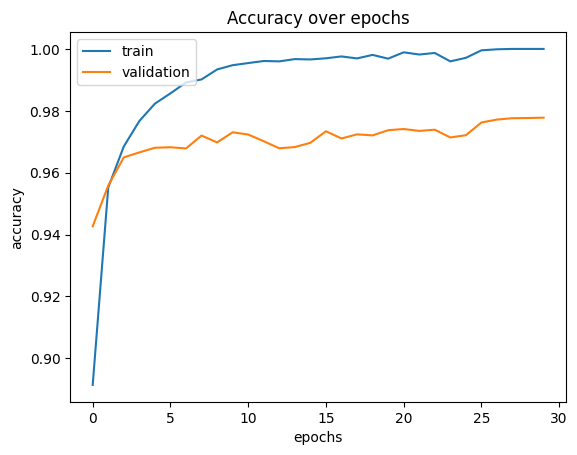

<Figure size 640x480 with 0 Axes>

In [7]:
fig, ax = plt.subplots()
ax.set_title('Accuracy over epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='validation')
ax.legend(loc='upper left')
plt.show()
plt.savefig('../figs/mnist_accuracy.png')

## Convolutional Neural Networks (CNN) mit Fashion-MNIST
Ziel: Verbesserung der Genauigkeit gegenüber einem einfachen Feedforward-Netz.

In [8]:
fashion = K.datasets.fashion_mnist
(x_train_mf, y_train_mf), (x_test_mf, y_test_mf) = fashion.load_data()
x_train_mf = x_train_mf / 255.0
x_test_mf = x_test_mf / 255.0
y_train_mf = K.utils.to_categorical(y_train_mf)
y_test_mf = K.utils.to_categorical(y_test_mf)

## CNN-Architektur definieren

1. Der erste Layer ist ein Conv2D-Layer:
   - `32` Filter mit einer Kerneldimension von `3×3`
   - **ReLU**-Aktivierung
   - `input_shape=(28, 28, 1)`: Eingabebilder sind `28×28` Pixel mit 1 Kanal (grau)

2. Anschließend reduziert ein **MaxPooling2D-Layer* die räumliche Dimension der
Featuremaps

3. Der **Flatten-Layer** wandelt die 2D-Ausgabe in einen 1D-Vektor um, sodass
dieser an vollverbundene (Dense) Schichten übergeben werden kann

4. Eine Dense-Schicht mit `100` **Neuronen** und **ReLU-Aktivierung* als Hidden-Layer

5. Ausgabeschicht für `10` **Klassen** (z. B. Ziffern oder Kleidungsstücke),
**Softmax-Aktivierung** liefert Wahrscheinlichkeiten

In [9]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

/home/iz/Dropbox/stuff/for-others/teaching/HFH/GKI/02-GKI-python/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Kompilierung des CNN-Modells

- Optimierer: `Adam` (effizient, adaptiv)
- Verlustfunktion: `categorical_crossentropy` (geeignet für mehrklassige
Klassifikation mit One-Hot-Labels)
- Metrik: `accuracy`

In [10]:
model2.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [11]:
x_train_mf = x_train_mf.reshape(-1, 28, 28, 1)
x_test_mf = x_test_mf.reshape(-1, 28, 28, 1)

## Training des CNNs auf Fashion-MNIST

- `x_train_mf` und `y_train_mf`: normalisierte Trainingsbilder und One-Hot-Labels
- `x_test_mf` und `y_test_mf`: Testdaten zur Validierung
- `30` Epochen, Batch-Größe `128`

In [ ]:
history = model2.fit(
    x_train_mf, y_train_mf,
    epochs = 30,
    batch_size = 128,
    validation_data = (x_test_mf, y_test_mf)
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.7778 - loss: 0.6366 - val_accuracy: 0.8578 - val_loss: 0.3816
Epoch 2/30
 73/469 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.8872 - loss: 0.3263

## Visualisierung des CNN-Trainingsverlaufs

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Accuracy over epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.plot(history.history['accuracy'], label = 'train')
ax.plot(history.history['val_accuracy'], label = 'validation')
ax.legend(loc = 'upper left')
plt.show()
plt.savefig('../figs/mnist_accuracy_convolutional.png')

## Zusammenfassung

- Das CNN beginnt mit einem Conv2D-Layer:
- Er verwendet 32 Filter mit einer Kernelgröße von 3x3
- Diese extrahieren lokale Bildmerkmale (z. B. Kanten, Texturen)
- Die erste Zahl (32) gibt die Anzahl der Filter (= Ausgabekanäle) an
- Eine höhere Anzahl an Filtern erhöht die Modellkapazität, aber auch den Rechenaufwand

In empirischen Tests zeigt sich:
- Bereits einfache CNNs erreichen ~99 % Trainingsgenauigkeit und ~91 % Testgenauigkeit
- Dies entspricht einem signifikanten Fortschritt gegenüber klassischen Feedforward-Netzen

Für eine bessere Generalisierbarkeit wurden zusätzliche Experimente durchgeführt:
- Variation der Anzahl der Filter im ersten Conv2D-Layer (z. B. 32, 40, 48, 56)
- Das Modell mit 48 Filtern schnitt im Mittel am besten auf den Testdaten ab

Eine weitere bewährte Technik zur Vermeidung von Overfitting ist der Einsatz eines Dropout-Layers:
- Während des Trainings werden zufällig ausgewählte Neuronen deaktiviert
- Dies verhindert eine zu starke Abhängigkeit von einzelnen Aktivierungen
- Ziel: bessere Generalisierbarkeit auf unbekannte Daten


## CNN mit Dropout zur Vermeidung von Overfitting
Ein Dropout-Layer deaktiviert während des Trainings zufällig 10 % der Neuronen
im vorherigen Layer. Ziel: Netz soll robuster gegen Überanpassung werden und besser auf neuen Daten generalisieren


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1)) # 10 % der Neuronen werden zufällig deaktiviert
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))